# Titanic: Previsão de Sobreviventes 🚢

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

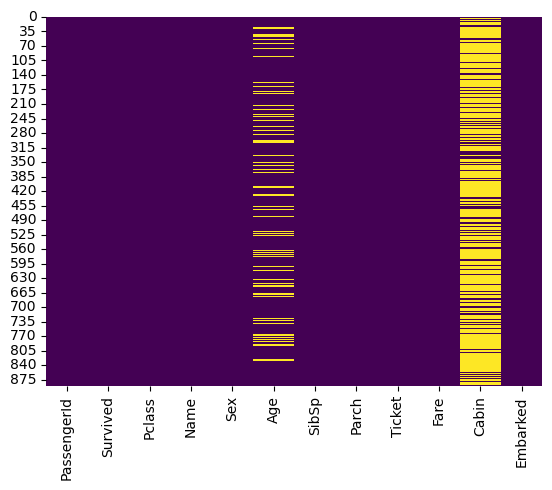

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

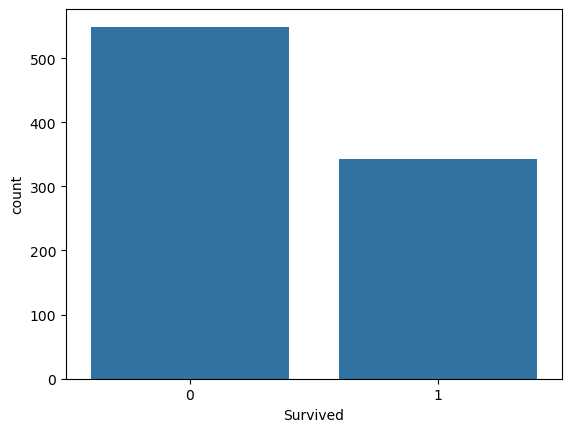

In [6]:
sns.countplot(x='Survived', data=df)
plt.show()

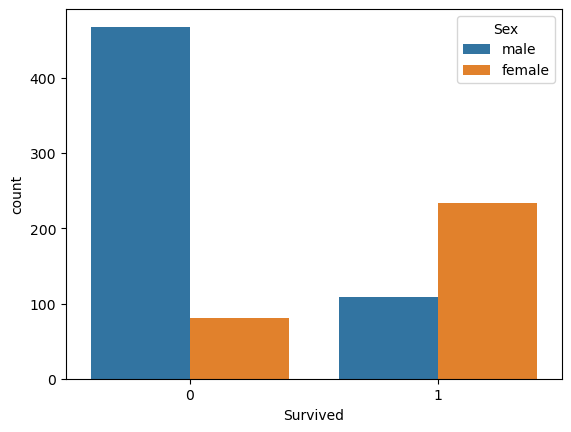

In [7]:
# O sexo influenciou na sobrevivência ?
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

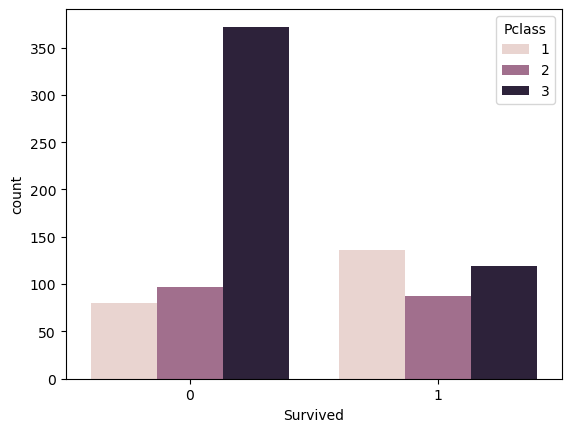

In [8]:
# A classe do passageiro influenciou na sobrevivência ?
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

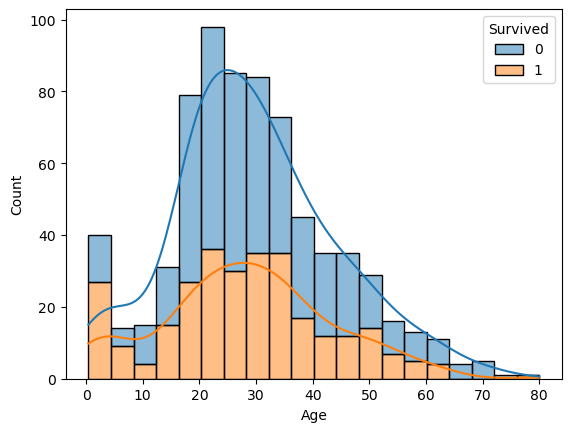

In [9]:
# A idade influenciou na sobrevivência ?
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack');
plt.show()

In [10]:
colunas_para_remover = ['PassengerId', 'Name', 'Cabin']
df_limpo = df.drop(colunas_para_remover, axis=1)

In [13]:
y = df_limpo['Survived']
x = df_limpo.drop('Survived', axis=1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
features_numericas = x.select_dtypes(include=['int64', 'float64']).columns
features_categoricas = x.select_dtypes(include=['object']).columns

In [21]:
pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [22]:
pipeline_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_numerico, features_numericas),
        ('cat', pipeline_categorico, features_categoricas)
    ])

In [27]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [28]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Ticket', 'Embarked'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [30]:
y_pred = model_pipeline.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.83      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



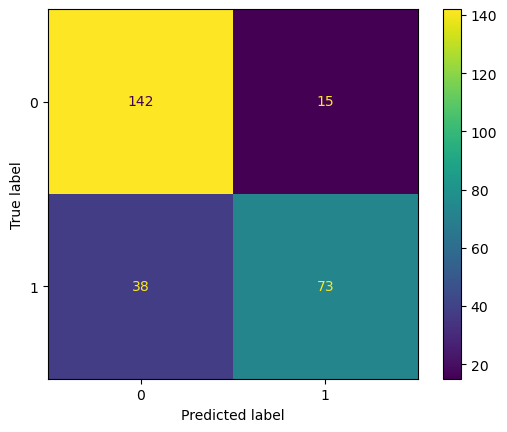

In [35]:
ConfusionMatrixDisplay.from_estimator(model_pipeline, x_test, y_test);

# ✅ Conclusão Final do Projeto

Este projeto demonstrou com sucesso a construção de um pipeline de Machine Learning completo e robusto para o clássico problema de previsão de sobreviventes do Titanic.

### Resumo do Processo

1.  **Análise Exploratória (EDA):** A análise inicial revelou a importância de características como `Sex` (Sexo), `Pclass` (Classe do Passageiro) e `Age` (Idade) para prever a sobrevivência. Também foi identificado o principal desafio do dataset: a presença significativa de valores ausentes na coluna `Age`.

2.  **Pré-processamento com Pipelines:** Para garantir um fluxo de trabalho limpo, organizado e livre de *data leakage*, foi utilizado o `ColumnTransformer` e `Pipeline` do Scikit-learn. Foram criados pipelines separados para tratar as features numéricas e categóricas, realizando as seguintes etapas de forma automática:
    *   **Imputação:** Preenchimento de valores ausentes em `Age` com a mediana e em `Embarked` com a moda.
    *   **Encoding:** Conversão de features categóricas com `OneHotEncoder`.
    *   **Scaling:** Padronização das features numéricas com `StandardScaler`.

3.  **Modelagem:** O pipeline de pré-processamento foi combinado com um classificador **Random Forest**, criando um único pipeline de ponta a ponta que foi treinado com os dados brutos.

### Resultados e Performance

O modelo final foi avaliado no conjunto de teste e apresentou um desempenho sólido e bem equilibrado:

*   **Acurácia Geral:** O modelo alcançou uma acurácia de **80%**.
*   **Performance na Classe "Sobreviveu":**
    *   **Precisão de 83%:** As previsões de "sobrevivência" feitas pelo modelo são bastante confiáveis.
    *   **Recall de 66%:** O modelo foi capaz de identificar corretamente dois terços de todos os passageiros que realmente sobreviveram.

**Conclusão Final:** O uso de pipelines se provou uma técnica extremamente eficaz para gerenciar a complexidade do pré-processamento de dados do mundo real. O modelo resultante não apenas atingiu uma alta performance, mas foi construído seguindo as melhores práticas da indústria.